   volume  pressure
0    2084      4599
1    2084      4600
2    2273      5044
3    2273      5043
4    2273      5044

n_samples:  33

n_features:  1

-----------
a. Construct a normal probability plot of the residuals. Does there seem to be any problem with the normality assumption?



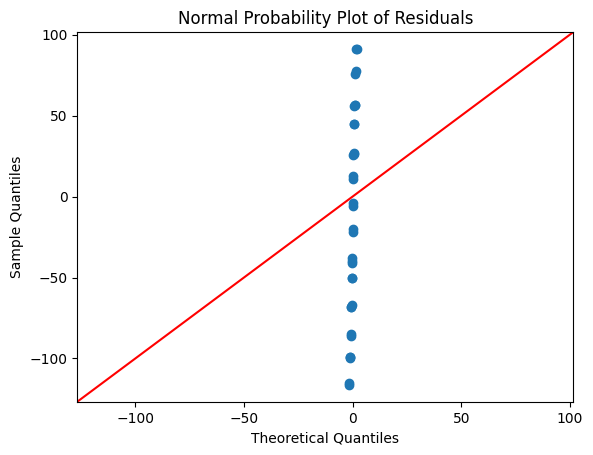


-----------

b. Construct and interpret a plot of the residuals versus the predicted response.



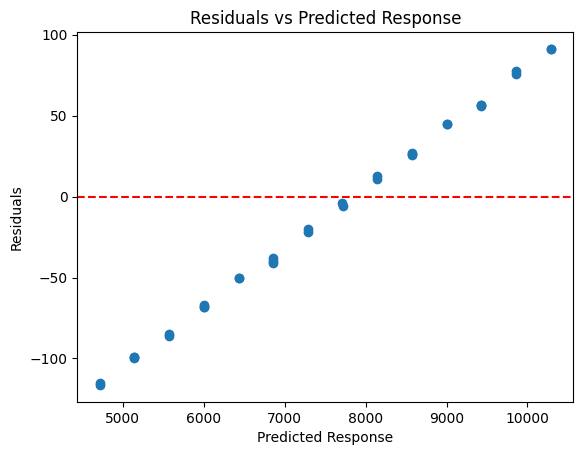


-----------

c. Suppose that the data were collected in the order shown in the table. Plot the residuals versus time order and comment on the plot.



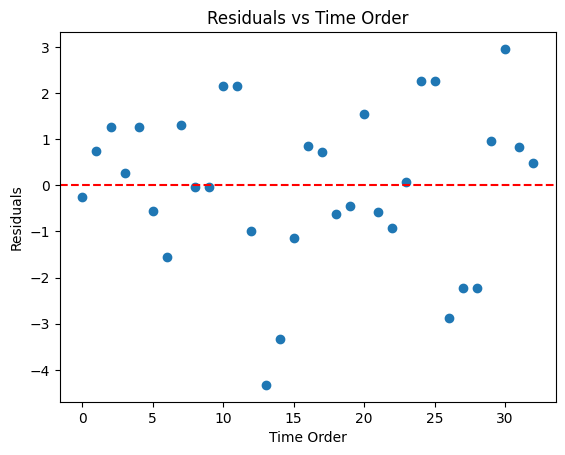

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.graphics.regressionplots import plot_partregress_grid

# Load the dataset
url = 'https://raw.githubusercontent.com/ramirezramiro/linear-reg/main/Model%20Adequacy%20Checking%20(ch.4)/data(ch.4)/vol-press.csv'
df = pd.read_csv(url)

specific_columns = df[["volume","pressure"]]
print(specific_columns.head())

# Extract the features (X) and target variable (y)
X = specific_columns[["volume"]].values
y = specific_columns["pressure"].values

n_samples = len(y)
print("\nn_samples: ", n_samples)

n_features = len(specific_columns.columns) - 1
print("\nn_features: ", n_features)

model = sm.OLS(y, X)
results = model.fit()
residuals = results.resid
y_pred = results.predict(X)

print("\n-----------")
print("a. Construct a normal probability plot of the residuals. Does there seem to be any problem with the normality assumption?\n")
# Print the mathematical function of the model

sm.qqplot(residuals, line='45')

# Customize the plot
plt.title('Normal Probability Plot of Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
# Display the plot
plt.show()
print("\n-----------\n")
print("b. Construct and interpret a plot of the residuals versus the predicted response.\n")

# Plot the residuals versus the predicted response
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0

# Customize the plot
plt.title('Residuals vs Predicted Response')
plt.xlabel('Predicted Response')
plt.ylabel('Residuals')

# Display the plot
plt.show()
print("\n-----------\n")

print("c. Suppose that the data were collected in the order shown in the table. Plot the residuals versus time order and comment on the plot.\n")
model_res = sm.OLS(y, sm.add_constant(X))
results_res = model_res.fit()
residuals_res = results_res.resid
y_pred = results_res.predict(sm.add_constant(X))

# Plot the residuals versus time order
plt.scatter(range(len(residuals_res)), residuals_res)
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0

# Customize the plot
plt.title('Residuals vs Time Order')
plt.xlabel('Time Order')
plt.ylabel('Residuals')

# Display the plot
plt.show()